# Polynomial Regression

Polynomial Regression is a type of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. It fits a nonlinear relationship between the value of x and the corresponding conditional mean of y


In [11]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import math

## Dataset generation

In [2]:
np.random.seed(42)

In [3]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

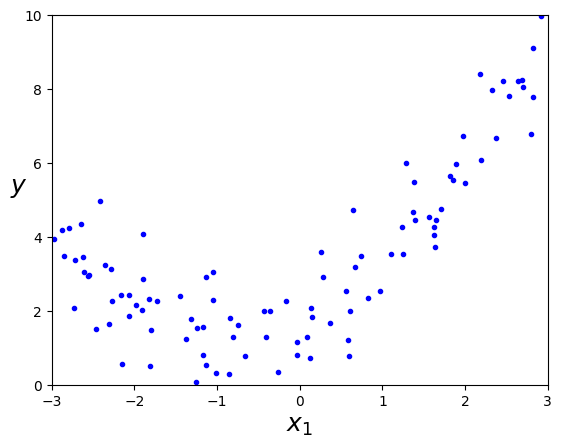

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [6]:
X_poly[0]

array([-0.75275929,  0.56664654])

## Model training

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

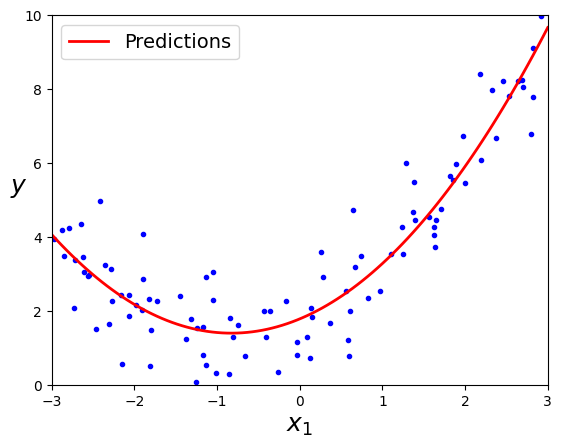

In [8]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

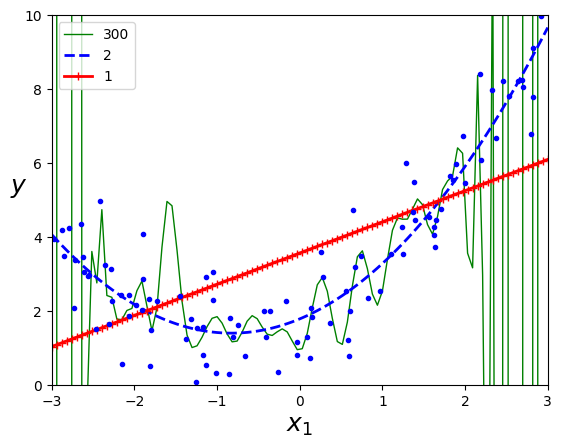

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

## Using real data

In [12]:
df = pd.read_csv('../xdata/Drugs_Performance.csv')
df.head()

,Age,Drugs_Perf
0,1,1.166667
1,2,1.833333
2,3,2.833333
3,4,4.166667
4,5,5.833333


In [14]:
X = df[["Age"]].values
y = df[["Drugs_Perf"]].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]]
[[1.16666667e+00]
 [1.83333333e+00]
 [2.83333333e+00]
 [4.16666667e+00]
 [5.83333333e+00]
 [7.83333333e+00]
 [1.01666667e+01]
 [1.28333333e+01]
 [1.58333333e+01]
 [1.91666667e+01]
 [2.28333333e+01]
 [2.68333333e+01]
 [3.11666667e+01]
 [3.58333333e+01]
 [4.08333333e+01]
 [4.61666667e+01]
 [5.18333333e+01]
 [5.78333333e+01]
 [6.41666667e+01]
 [7.08333333e+01]
 [7.78333333e+01]
 [8.51666667e+01]
 [9.28333333e+01]
 [1.00833333e+02]
 [1.09166667e+02]
 [1.17833333e+02]
 [1.26833333e+02]
 [1.36166

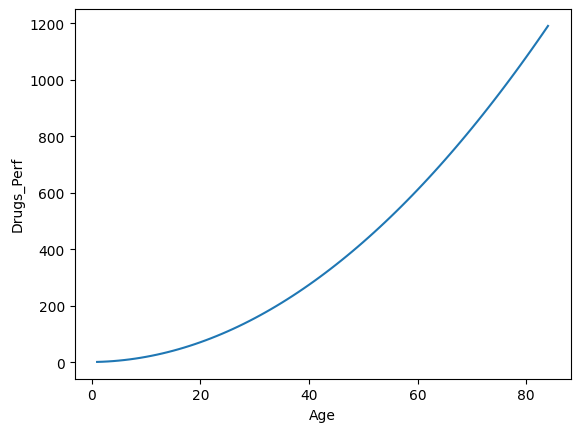

In [15]:
plt.plot(X,y)
plt.xlabel("Age")
plt.ylabel("Drugs_Perf")
plt.show()

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2)

## Preprocessing

In [17]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, Y_train)

PolynomialFeatures()

## Model Training

In [18]:
model = LinearRegression()
model.fit(X_poly,Y_train)

LinearRegression()

Text(0, 0.5, 'Drugs Performance')

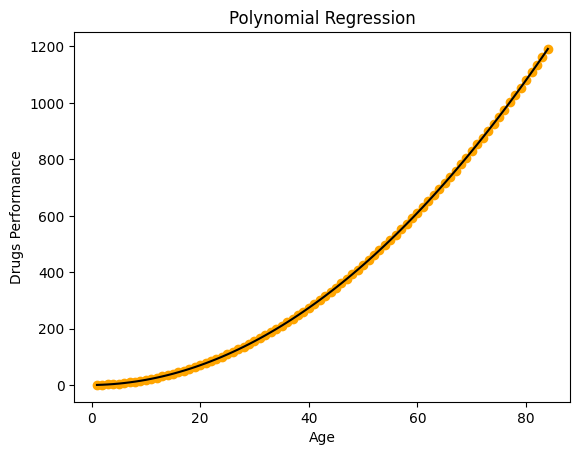

In [19]:
plt.scatter(X,y, color = 'orange')
plt.plot(X,model.predict(poly.fit_transform(X)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Drugs Performance')

## Prediction

In [21]:
print('Prediction:\t', model.predict(poly.fit_transform(X_test)))

Prediction:	 [[   5.83333332]
 [  22.83333333]
 [ 287.83333334]
 [ 651.83333331]
 [ 316.16666667]
 [  19.16666666]
 [ 852.83333328]
 [1001.83333327]
 [ 345.83333333]
 [ 222.83333334]
 [ 901.16666661]
 [ 782.83333329]
 [ 829.16666662]
 [ 247.83333334]
 [1027.83333326]
 [ 925.83333328]
 [  40.83333333]]
